In [1]:
# conda install -c conda-forge matplotlib
# conda install -c conda-forge scikit-learn
# conda install -c conda-forge numpy
%matplotlib inline
import pandas as pd

In [9]:
%%sh
pwd

/home/wasit/github/2020/depa/day04_data_preparation/titatic


In [7]:
%%sh
ls -a

.
..
.ipynb_checkpoints
Titanic Demo.ipynb
train.csv


In [10]:
df_train=pd.read_csv('train.csv')

In [22]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


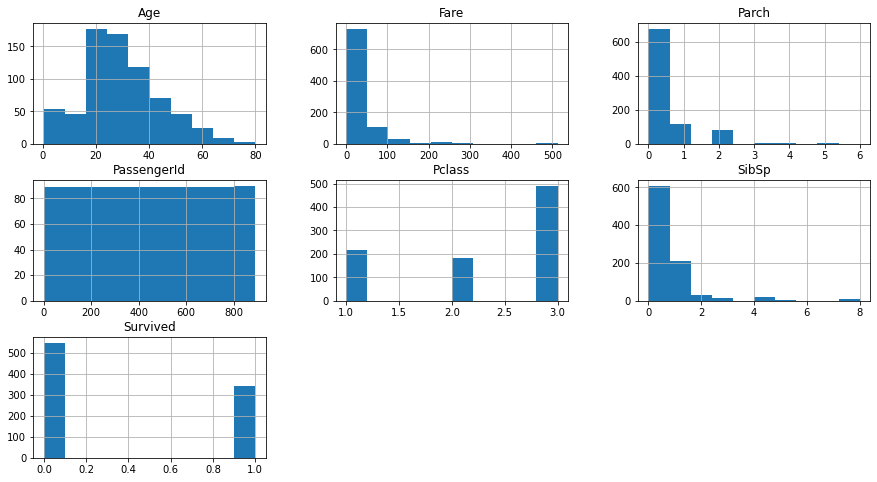

In [20]:
ax=df_train.hist(figsize=(15,8))

In [33]:
#Drop Column: PassengerId, Name, Ticket, Cabin
df1=df_train.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'],axis=1)
#Drop Row: Age, Embarked
df2=df1.dropna()
#Convert Categorical data to numeric data: Sex, Embarked


In [34]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [35]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  712 non-null    int64  
 1   Pclass    712 non-null    int64  
 2   Sex       712 non-null    object 
 3   Age       712 non-null    float64
 4   SibSp     712 non-null    int64  
 5   Parch     712 non-null    int64  
 6   Fare      712 non-null    float64
 7   Embarked  712 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 50.1+ KB


In [36]:
%%timeit -n1
df3=df2
df3['sex_cat_old']=0
for i in df3.iterrows():
    if i[1]['Sex']=='male':
        df3['sex_cat_old'][i[0]]=1
#df3.head()

/home/wasit/miniconda3/envs/2020/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/wasit/miniconda3/envs/2020/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/home/wasit/miniconda3/envs/2020/lib/python3.6/site-packages/IPython/core/magics/execution.py:169: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#r

128 ms ± 8.88 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [37]:
%%timeit -n1
df4=df2
df4['sex_cat']=df4['Sex'].astype('category').cat.codes
df4.head()

1.97 ms ± 820 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


/home/wasit/miniconda3/envs/2020/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [38]:
df2.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,sex_cat_old,sex_cat
0,0,3,male,22.0,1,0,7.2500,S,1,1
1,1,1,female,38.0,1,0,71.2833,C,0,0
2,1,3,female,26.0,0,0,7.9250,S,0,0
3,1,1,female,35.0,1,0,53.1000,S,0,0
4,0,3,male,35.0,0,0,8.0500,S,1,1


In [39]:
df4=df2
df4.loc[:,'sex_cat']=df4['Sex'].astype('category').cat.codes
df4.loc[:,'embarked_cat']=df4['Embarked'].astype('category').cat.codes
df4.head()

/home/wasit/miniconda3/envs/2020/lib/python3.6/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/home/wasit/miniconda3/envs/2020/lib/python3.6/site-packages/pandas/core/indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,sex_cat_old,sex_cat,embarked_cat
0,0,3,male,22.0,1,0,7.2500,S,1,1,2
1,1,1,female,38.0,1,0,71.2833,C,0,0,0
2,1,3,female,26.0,0,0,7.9250,S,0,0,2
3,1,1,female,35.0,1,0,53.1000,S,0,0,2
4,0,3,male,35.0,0,0,8.0500,S,1,1,2


In [40]:
df4.keys()

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked', 'sex_cat_old', 'sex_cat', 'embarked_cat'],
      dtype='object')

In [41]:
header=['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'sex_cat', 'embarked_cat']
df5=df4[header]
df5.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,sex_cat,embarked_cat
0,0,3,22.0,1,0,7.2500,1,2
1,1,1,38.0,1,0,71.2833,0,0
2,1,3,26.0,0,0,7.9250,0,2
3,1,1,35.0,1,0,53.1000,0,2
4,0,3,35.0,0,0,8.0500,1,2


In [44]:
yx=df5.to_numpy()

In [45]:
yx

array([[ 0.    ,  3.    , 22.    , ...,  7.25  ,  1.    ,  2.    ],
       [ 1.    ,  1.    , 38.    , ..., 71.2833,  0.    ,  0.    ],
       [ 1.    ,  3.    , 26.    , ...,  7.925 ,  0.    ,  2.    ],
       ...,
       [ 1.    ,  1.    , 19.    , ..., 30.    ,  0.    ,  2.    ],
       [ 1.    ,  1.    , 26.    , ..., 30.    ,  1.    ,  0.    ],
       [ 0.    ,  3.    , 32.    , ...,  7.75  ,  1.    ,  1.    ]])

In [46]:
yx.shape

(712, 8)

In [47]:
X_train=yx[:,1:]
y_train=yx[:,0]

In [48]:
X_train.shape

(712, 7)

In [49]:
y_train.shape

(712,)

# Supervised Learning

In [50]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

In [59]:
gb = GradientBoostingClassifier(n_estimators=50, learning_rate = 0.1, max_features=2, max_depth = 2, random_state = 0)
gb.fit(X_train, y_train)
np.average( cross_val_score(gb, X_train, y_train, cv=5) )

0.7978036048458584

In [60]:
header

['Survived',
 'Pclass',
 'Age',
 'SibSp',
 'Parch',
 'Fare',
 'sex_cat',
 'embarked_cat']

In [61]:
X_train[:10,:]

array([[ 3.    , 22.    ,  1.    ,  0.    ,  7.25  ,  1.    ,  2.    ],
       [ 1.    , 38.    ,  1.    ,  0.    , 71.2833,  0.    ,  0.    ],
       [ 3.    , 26.    ,  0.    ,  0.    ,  7.925 ,  0.    ,  2.    ],
       [ 1.    , 35.    ,  1.    ,  0.    , 53.1   ,  0.    ,  2.    ],
       [ 3.    , 35.    ,  0.    ,  0.    ,  8.05  ,  1.    ,  2.    ],
       [ 1.    , 54.    ,  0.    ,  0.    , 51.8625,  1.    ,  2.    ],
       [ 3.    ,  2.    ,  3.    ,  1.    , 21.075 ,  1.    ,  2.    ],
       [ 3.    , 27.    ,  0.    ,  2.    , 11.1333,  0.    ,  2.    ],
       [ 2.    , 14.    ,  1.    ,  0.    , 30.0708,  0.    ,  0.    ],
       [ 3.    ,  4.    ,  1.    ,  1.    , 16.7   ,  0.    ,  2.    ]])

In [62]:
gb.predict(X_train[:10,:])

array([0., 1., 1., 1., 0., 0., 0., 1., 1., 1.])

In [63]:
y_train[:10]

array([0., 1., 1., 1., 0., 0., 0., 1., 1., 1.])

# Deploy ML

In [64]:
import pickle
filename = 'titanic.model'
pickle.dump(gb, open(filename, 'wb'))

In [65]:
loaded_model = pickle.load(open(filename, 'rb'))
loaded_model.predict(X_train[:10,:])

array([0., 1., 1., 1., 0., 0., 0., 1., 1., 1.])

# Feature Importance

In [68]:
print(gb.feature_importances_)

[0.12974289 0.09655729 0.03409731 0.03011302 0.14287245 0.54174293
 0.0248741 ]


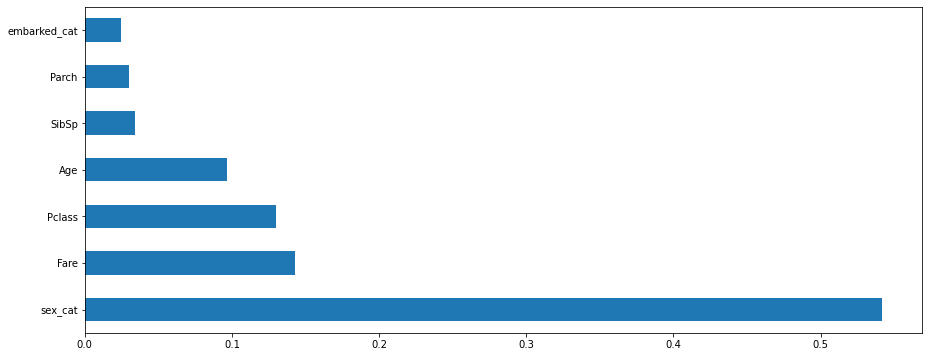

In [79]:
feat_importances = pd.Series(gb.feature_importances_, index=header[1:])
ax=feat_importances.nlargest(10).plot(kind='barh',figsize=(15,6))